### TP2 Intégration temporelle ###

In [32]:
import numpy as np
import matplotlib.pyplot as plt

### 1 Schéma d'Euler explicite #

1. Implementer les schemas discrets combinant les discretisations spatiales FOU et UPO2VF avec le schema d’Euler explicite

In [33]:
def FOU(a, dx, u):
    du = np.zeros(len(u))
    du[0] = -a/dx*(u[0]-u[-1])
    du[1:] = -a/dx*(u[1:] - u[:-1])
    return du


def UPO2VF(a, dx, u):
    du = np.zeros(len(u))
    du = -a/(4*dx)*( np.concatenate((u[1:], [u[0]])) + 3*u - 5*np.concatenate( ([u[-1]], u[:-1])) + np.concatenate( ([u[-2], u[-1]], u[:-2]))) 
    return du

def euler_explicite(f, u0, a, dx, cfl):
    dt = cfl*dx/a
    n = int(T/dt)
    u = np.copy(u0)
    for i in range(n):
        u = u + dt*f(a, dx, tu)
    return u



2. Tester le programme sur les CFLs 0.1, 0.5 et 1. Que peut-on observer avec les deux schemas ?

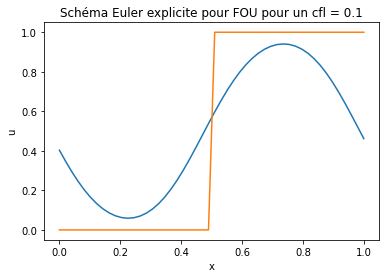

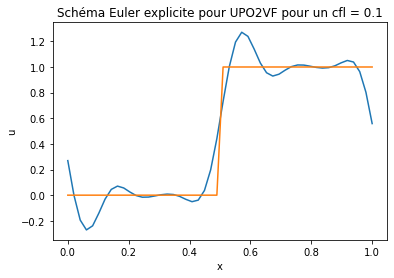

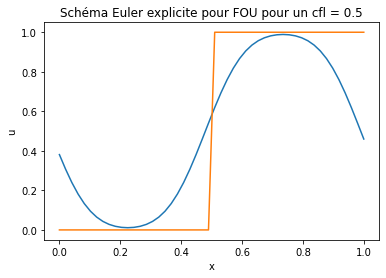

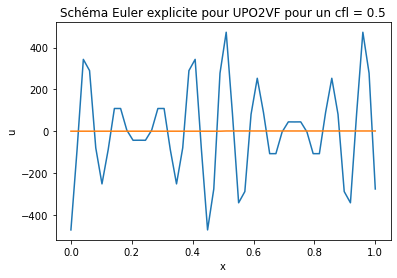

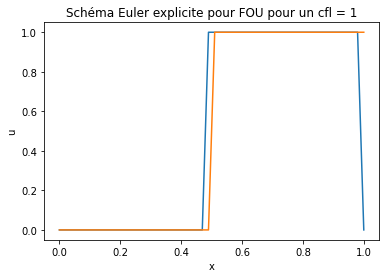

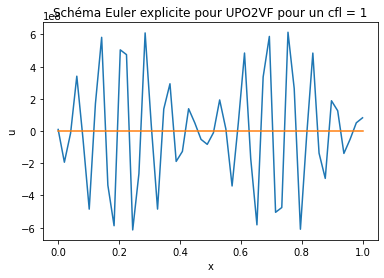

In [34]:
a = 1.0 # vitesse de convection 

L = 1
m = 50
x_0 = 0.5

x = np.linspace(0,L,m)
cfl_list=[0.1,0.5,1]
dx = x[1]- x[0]
T = L/a # période , t_fin

u_init = (x>=x_0).astype(int)

for cfl in cfl_list:
    plt.figure()
    plt.plot(x, euler_explicite(FOU, u_init, a, dx, cfl))
    plt.plot(x,u_init)
    plt.title('Schéma Euler explicite pour FOU pour un cfl = {}'.format(cfl))
    plt.xlabel('x')
    plt.ylabel('u')
    
    plt.figure()
    plt.plot(x, euler_explicite(UPO2VF, u_init, a, dx, cfl))
    plt.plot(x,u_init)
    plt.title('Schéma Euler explicite pour UPO2VF pour un cfl = {}'.format(cfl))
    plt.xlabel('x')
    plt.ylabel('u')

Pour un CFL > 0.1, le schéma UPO2VF diverge. Donc le schéma FOU "est plus stable" que UPO2VF (en tout cas, ses conditions de stabilité sont moins restrictives que celles de UPO2VF) avec le schéma d'Euler explicite.

### 2 Schema de Runge-Kutta explicite d’ordre deux #

1. Implementer les schemas discrets combinant les discretisations spatiales FOU et UPO2VF avec le schema de Runge-Kutta explicite

In [35]:
def runge_kutta(f, u0, a, dx, cfl):
    dt = cfl*dx/a
    n = int(T/dt)
    u = np.copy(u0)
    for i in range(n):
        u_etoile = u + dt*f(a, dx, u)
        u = u + dt*(1/2*f(a, dx, u_etoile) + 1/2*f(a, dx, u)) 
    return u

2. Tester le programme sur les CFLs 0.1, 0.5 et 1. Que peut-on observer avec les deux schemas ?

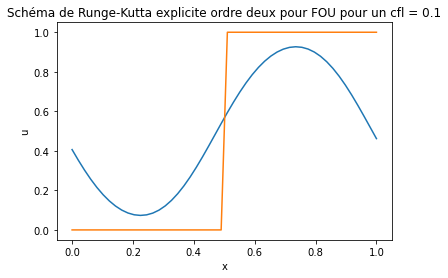

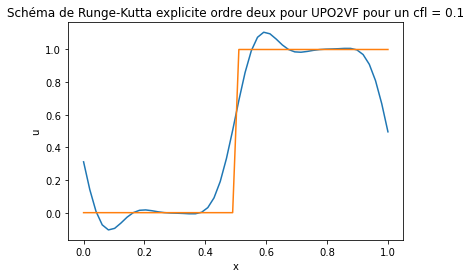

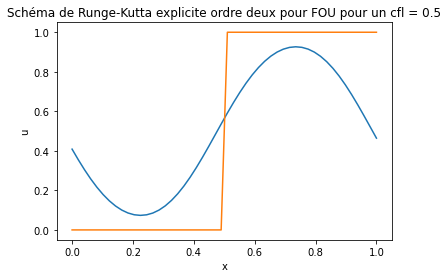

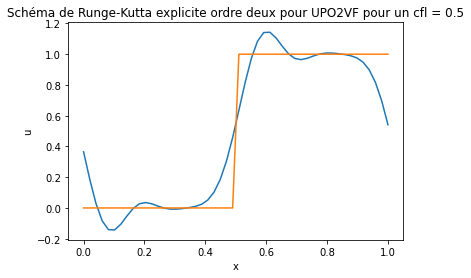

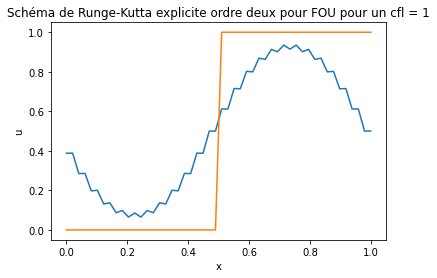

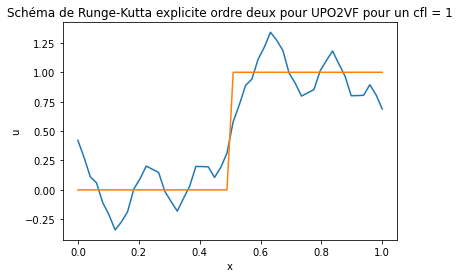

In [36]:
cfl_list=[0.1,0.5,1]

for cfl in cfl_list:
    plt.figure()
    plt.plot(x, runge_kutta(FOU, u_init, a, dx, cfl))
    plt.plot(x,u_init)
    plt.title('Schéma de Runge-Kutta explicite ordre deux pour FOU pour un cfl = {}'.format(cfl))
    plt.xlabel('x')
    plt.ylabel('u')
    
    plt.figure()
    plt.plot(x, runge_kutta(UPO2VF, u_init, a, dx, cfl))
    plt.plot(x,u_init)
    plt.title('Schéma de Runge-Kutta explicite ordre deux pour UPO2VF pour un cfl = {}'.format(cfl))
    plt.xlabel('x')
    plt.ylabel('u')

Avec Runge-Kutta explicite, les deux schémas sont stables pour un CFL inférieur à 1. Cependant, le schéma de Runge-Kutta explicite est monotone avec le schéma FOU mais pas avec le schéma UPO2VF.

### 3 Schema d’Euler implicite #

1. Implementer les schemas discrets combinant les discretisations spatiales FOU et UPO2VF avec le schema d’Euler implicite.

In [37]:
# On reprend les fonctions du cours
def fou_mat(a, dx):
    P = np.diag(np.ones(m-1), k=1)
    P[-1,0] = 1
    return -a/dx*(np.identity(m)-np.linalg.matrix_power(P, -1))

def upo2vf_mat(a, dx):
    P = np.diag(np.ones(m-1), k=1)
    P[-1,0] = 1
    return -a/(4*dx)*(P + 3*np.identity(m)-5*np.linalg.matrix_power(P, -1) + np.linalg.matrix_power(P, -2))

def euler_implicite(f, u0, a, dx, cfl):
    dt = cfl*dx/a
    n = int(T/dt)
    u = np.copy(u0)
    for i in range(n):
        u = np.linalg.solve((np.identity(m)-dt*f(a,dx)), u)
    return u


2. Tester le programme sur les CFLs 0.1, 0.5, 1, 10 et 20. Que peut-on observer avec les deux schemas ?

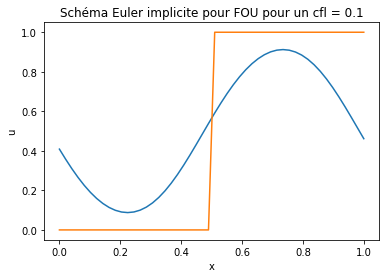

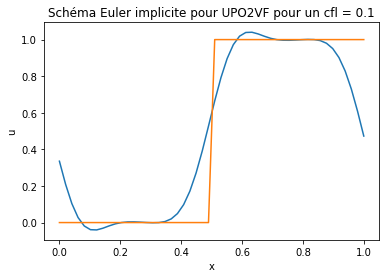

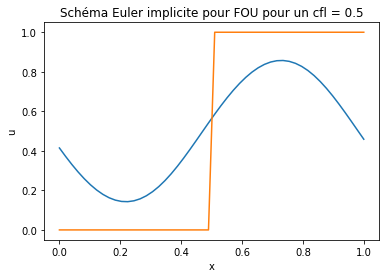

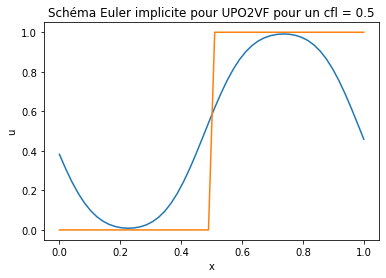

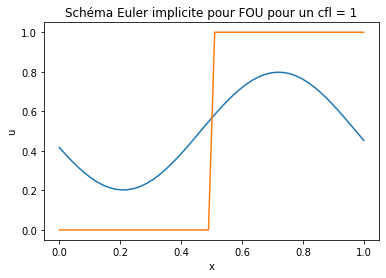

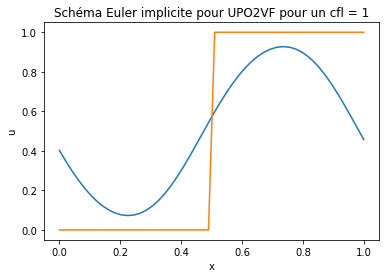

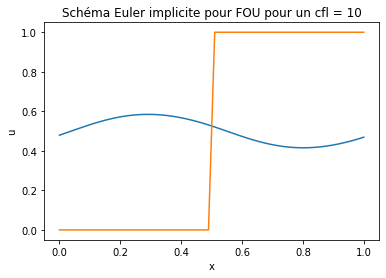

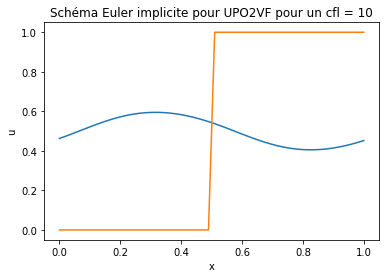

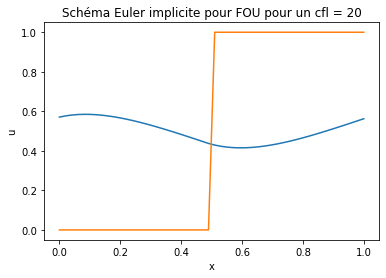

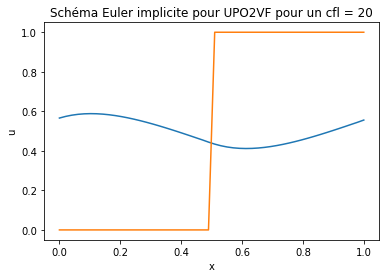

In [38]:
cfl_list=[0.1,0.5,1, 10, 20]

for cfl in cfl_list:
    plt.figure()
    plt.plot(x, euler_implicite(fou_mat, u_init, a, dx, cfl))
    plt.plot(x,u_init)
    plt.title('Schéma Euler implicite pour FOU pour un cfl = {}'.format(cfl))
    plt.xlabel('x')
    plt.ylabel('u')
    
    plt.figure()
    plt.plot(x, euler_implicite(upo2vf_mat, u_init, a, dx, cfl))
    plt.plot(x,u_init)
    plt.title('Schéma Euler implicite pour UPO2VF pour un cfl = {}'.format(cfl))
    plt.xlabel('x')
    plt.ylabel('u')

En utilisant le schéma d'Euler implicite, les deux schémas sont inconditionellement stables.